# Predicting Heart Disease

This dataset contains 76 features, but all published experiments refer to using a subset of 14 of them. The "goal" feature refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4 (values 1,2,3,4) from absence (value 0). It is therefore a multiclass classification problem.

*For our example, we will use several more features than the traditional 14.*

Feature info (attributes used): 
1. feature 3 (age) - Age in years
2. feature 4 (sex) - male or female
3. feature 9 (cp) - chest pain type (typical angina, atypical angina, non-anginal, asymptomatic)
4. feature 10 (trestbps) - resting blood pressure (mm Hg)
5. feature 12 (chol) - cholesterol (mg/dl)
6. feature 14 (cigperday) - number of cigarettes per day
7. feature 16 (fbs) - fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 
8. feature 18 (famhist) - family history of heart disease (1 = true; 0 = false)
9. feature 19 (restecg) - resting electrocardiographic results (normal; st-t = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); vent = showing probable or definite left ventricular hypertrophy by Estes' criteria)
10. feature 32 (thalach) - maximum heart rate achieved
11. feature 38 (exang) - exercise induced angina (1 = yes; 0 = no)
12. feature 40 (oldpeak) - ST depression induced by exercise relative to rest
13. feature 41 (slope) - the slope of the peak exercise ST segment (upsloping, flat, downsloping)
14. feature 44 (ca) - number of major vessels (0-3) colored by flourosopy
15. feature 51 (thal) - normal, fixed defect, or reversable defect
16. feature 58 (target) (the predicted attribute) 
  - 0: < 50% diameter narrowing
  - 1+: > 50% diameter narrowing

### Our focus in using this dataset will be exploring pre-processing methods more thoroughly

More details can be found at [the UCI repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease).

### Acknowledgments

The authors of the dataset have requested that any use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be: 

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Loading the data from CSV

We can read the data directly from the CSV located in the [data/](data/) directory. The [raw data](data/heart-disease-raw.csv) was pre-processed to re-name categorical features where they are otherwise ordinal variables. This allows us to walk through an entire pre-processing pipeline

In [1]:
import pandas as pd
import numpy as np

from functions import cls as packt_classes

# read the raw csv
X = pd.read_csv('data/heart-disease-2.csv', header=None)

# rename the columns
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'cigperday', 'fbs', 'famhist',
        'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

X.columns = cols
y = X.pop('target')  # don't want target in the X matrix
X.head()

,age,sex,cp,trestbps,chol,cigperday,fbs,famhist,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,male,typical anginal,145,233,50.0,1,1,vent,150,0,2.3,downsloping,0.0,fixed
1,67,male,asymptomatic,160,286,40.0,0,1,vent,108,1,1.5,flat,3.0,normal
2,67,male,asymptomatic,120,229,20.0,0,1,vent,129,1,2.6,flat,2.0,reversable
3,37,male,non-anginal,130,250,0.0,0,1,normal,187,0,3.5,downsloping,0.0,normal
4,41,female,atypical anginal,130,204,0.0,0,1,vent,172,0,1.4,upsloping,0.0,normal


## Pre-split: any major imbalance?

If there are any categorical features with rare factor levels that need to be considered before splitting, we'll find out here.

In [2]:
def examine_cats(frame):
    for catcol in frame.columns[frame.dtypes == 'object'].tolist():
        print(catcol)
        print(frame[catcol].value_counts())
        print("")
        
examine_cats(X)

sex
male      206
female     97
Name: sex, dtype: int64

cp
asymptomatic        144
non-anginal          86
atypical anginal     50
typical anginal      23
Name: cp, dtype: int64

restecg
normal    151
vent      148
st-t        4
Name: restecg, dtype: int64

slope
upsloping      142
flat           140
downsloping     21
Name: slope, dtype: int64

thal
normal        166
reversable    117
fixed          18
Name: thal, dtype: int64



# Perform train/test split

Remember, we always need to split! We will also stratify on the '`restecg`' variable since it's the most likely to be poorly split.

In [3]:
from sklearn.model_selection import train_test_split

seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed, 
                                                    stratify=X['restecg'])

print("Train size: %i" % X_train.shape[0])
print("Test size: %i" % X_test.shape[0])
X_train.head()

Train size: 227
Test size: 76


,age,sex,cp,trestbps,chol,cigperday,fbs,famhist,restecg,thalach,exang,oldpeak,slope,ca,thal
167,54,female,atypical anginal,132,288,0.0,1,0,vent,159,1,0.0,upsloping,1.0,normal
166,52,male,non-anginal,138,223,50.0,0,1,normal,169,0,0.0,upsloping,NaN,normal
300,57,male,asymptomatic,130,131,50.0,0,0,normal,115,1,1.2,flat,1.0,reversable
185,63,female,atypical anginal,140,195,2.0,0,1,normal,179,0,0.0,upsloping,2.0,normal
84,52,male,atypical anginal,120,325,30.0,0,1,normal,172,0,0.2,upsloping,0.0,normal


In [4]:
examine_cats(X_train)

sex
male      153
female     74
Name: sex, dtype: int64

cp
asymptomatic        105
non-anginal          66
atypical anginal     37
typical anginal      19
Name: cp, dtype: int64

restecg
normal    113
vent      111
st-t        3
Name: restecg, dtype: int64

slope
flat           110
upsloping      102
downsloping     15
Name: slope, dtype: int64

thal
normal        121
reversable     92
fixed          12
Name: thal, dtype: int64



# Custom Transformers

There are several custom transformers that will be useful for this data:

- Custom one-hot encoding that drops one level to avoid the [dummy variable trap](http://www.algosome.com/articles/dummy-variable-trap-regression.html)
- Model-based imputation of continuous variables, since mean/median centering is rudimentary

### Custom base class

We'll start with a cusom base class that depends on the input to be a Pandas dataframe. This base class will provide super methods for validating the input type as well as the presence of any prescribed columns.

In [5]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class CustomPandasTransformer(BaseEstimator, TransformerMixin):
    def _validate_input(self, X):
        if not isinstance(X, pd.DataFrame):
            raise TypeError("X must be a DataFrame, but got type=%s" 
                            % type(X))
        return X
    
    @staticmethod
    def _validate_columns(X, cols):
        scols = set(X.columns)  # set for O(1) lookup
        if not all(c in scols for c in cols):
            raise ValueError("all columns must be present in X")

## Explanation of LabelEncoder

In [6]:
from sklearn.preprocessing import LabelEncoder

labels = ['banana', 'apple', 'orange', 'apple', 'orange']
le = LabelEncoder()
le.fit(labels)
le.transform(labels)

array([1, 0, 2, 0, 2])

# One-hot encode categorical data

It is probably (hopefully) obvious why we need to handle data that is in string format. There is not much we can do numerically with data that resembles the following:

    [flat, upsloping, downsloping, ..., flat, flat, downsloping]
    
There is a natural procedure to force numericism amongst string data: map each unique string to a unique level (1, 2, 3). This is, in fact, exactly what the sklearn [`LabelEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) does. However, this is not sufficient for modeling purposes, since most algorithms will treat this as [ordinal data](https://en.wikipedia.org/wiki/Ordinal_data), where in many cases it is not. Imagine you fit a regression on data you've label-encoded, and one feature (type of chest pain, for instance) is now:

    [0, 2, 3, ..., 1, 0]
    
You might get coefficients back that make no sense since "asymptomatic" or "non-anginal", etc., are not inherently numerically greater or less than one another. Therefore, we [*one-hot encode*](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) our categorical data into a numerical representation. Now we have dummy data and a binary feature for each variable/factor-level combination.

In [7]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

class DummyEncoder(CustomPandasTransformer):
    """A custom one-hot encoding class that handles previously unseen
    levels and automatically drops one level from each categorical
    feature to avoid the dummy variable trap.
    
    Parameters
    ----------
    columns : list
        The list of columns that should be dummied
        
    sep : str or unicode, optional (default='_')
        The string separator between the categorical feature name
        and the level name.
        
    drop_one_level : bool, optional (default=True)
        Whether to drop one level for each categorical variable.
        This helps avoid the dummy variable trap.
        
    tmp_nan_rep : str or unicode, optional (default="N/A")
        Each categorical variable adds a level for missing values
        so test data that is missing data will not break the encoder
    """
    def __init__(self, columns, sep='_', drop_one_level=True, 
                 tmp_nan_rep='N/A'):
        self.columns = columns
        self.sep = sep
        self.drop_one_level = drop_one_level
        self.tmp_nan_rep = tmp_nan_rep
        
    def fit(self, X, y=None):
        # validate the input, and get a copy of it
        X = self._validate_input(X).copy()
        
        # load class attributes into local scope
        tmp_nan = self.tmp_nan_rep
        
        # validate all the columns present
        cols = self.columns
        self._validate_columns(X, cols)
                
        # begin fit
        # for each column, fit a label encoder
        lab_encoders = {}
        for col in cols:
            vec = [tmp_nan if pd.isnull(v) 
                   else v for v in X[col].tolist()]
            
            # if the tmp_nan value is not present in vec, make sure it is
            # so the transform won't break down
            svec = list(set(vec))
            if tmp_nan not in svec:
                svec.append(tmp_nan)
            
            le = LabelEncoder()
            lab_encoders[col] = le.fit(svec)
            
            # transform the column, re-assign
            X[col] = le.transform(vec)
            
        # fit a single OHE on the transformed columns - but we need to ensure
        # the N/A tmp_nan vals make it into the OHE or it will break down later.
        # this is a hack - add a row of all transformed nan levels
        ohe_set = X[cols]
        ohe_nan_row = {c: lab_encoders[c].transform([tmp_nan])[0] for c in cols}
        ohe_set = ohe_set.append(ohe_nan_row, ignore_index=True)
        ohe = OneHotEncoder(sparse=False).fit(ohe_set)
        
        # assign fit params
        self.ohe_ = ohe
        self.le_ = lab_encoders
        self.cols_ = cols
        
        return self
    
    def transform(self, X):
        check_is_fitted(self, 'ohe_')
        X = self._validate_input(X).copy()
        
        # fit params that we need
        ohe = self.ohe_
        lenc = self.le_
        cols = self.cols_
        tmp_nan = self.tmp_nan_rep
        sep = self.sep
        drop = self.drop_one_level
        
        # validate the cols and the new X
        self._validate_columns(X, cols)
        col_order = []
        drops = []
        
        for col in cols:
            # get the vec from X, transform its nans if present
            vec = [tmp_nan if pd.isnull(v) 
                   else v for v in X[col].tolist()]
            
            le = lenc[col]
            vec_trans = le.transform(vec)  # str -> int
            X[col] = vec_trans
            
            # get the column names (levels) so we can predict the 
            # order of the output cols
            le_clz = le.classes_.tolist()
            classes = ["%s%s%s" % (col, sep, clz) for clz in le_clz]
            col_order.extend(classes)
            
            # if we want to drop one, just drop the last
            if drop and len(le_clz) > 1:
                drops.append(classes[-1])
                
        # now we can get the transformed OHE
        ohe_trans = pd.DataFrame.from_records(data=ohe.transform(X[cols]), 
                                              columns=col_order)
        
        # set the index to be equal to X's for a smooth concat
        ohe_trans.index = X.index
        
        # if we're dropping one level, do so now
        if drops:
            ohe_trans = ohe_trans.drop(drops, axis=1)
        
        # drop the original columns from X
        X = X.drop(cols, axis=1)
        
        # concat the new columns
        X = pd.concat([X, ohe_trans], axis=1)
        return X

In [8]:
de = DummyEncoder(columns=['sex', 'cp', 'restecg', 'slope', 'thal'])
de.fit(X_train)
X_train_dummied = de.transform(X_train)
X_train_dummied.head()

,age,trestbps,chol,cigperday,fbs,famhist,thalach,exang,oldpeak,ca,...,cp_non-anginal,restecg_N/A,restecg_normal,restecg_st-t,slope_N/A,slope_downsloping,slope_flat,thal_N/A,thal_fixed,thal_normal
167,54,132,288,0.0,1,0,159,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
166,52,138,223,50.0,0,1,169,0,0.0,NaN,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300,57,130,131,50.0,0,0,115,1,1.2,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
185,63,140,195,2.0,0,1,179,0,0.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
84,52,120,325,30.0,0,1,172,0,0.2,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Imputation

We can either use a built-in scikit-learn `Imputer`, which will require mean/median as a statistic, or we can build a model.

## Statistic-based imputation

In [9]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')
imputer.fit(X_train_dummied)
imputer.transform(X_train_dummied)[:5]

array([[  5.40000000e+01,   1.32000000e+02,   2.88000000e+02,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.59000000e+02,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00],
       [  5.20000000e+01,   1.38000000e+02,   2.23000000e+02,
          5.00000000e+01,   0.00000000e+00,   1.00000000e+00,
          1.69000000e+02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,



## Model-based imputation

As discussed in the iris notebook, there are many pitfalls to using mean or median for scaling. In instances where our data is too large to examine all features graphically, many times we cannot discern whether all features are normally distributed (a pre-requisite for mean-scaling). If we want to get more sophisticated, we can use an approach for imputation that is based on a model; we will use a [`BaggingRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html) (since we are filling in NaN continuous variables only at this point).

Note that there are other common approaches for this, like KNN imputation, but nearest neighbors models require your data to be scaled, which we're trying to avoid.

### Beware:

Sometimes missing data is informative. For instance... failure to report `cigperday` could be a bias on part of the patient who may not want to receive judgment or a lecture, or could indicate 0.

In [10]:
from sklearn.ensemble import BaggingRegressor
from sklearn.externals import six

class BaggedRegressorImputer(CustomPandasTransformer):
    """Fit bagged regressor models for each of the impute columns in order
    to impute the missing values.
    
    Parameters
    ----------
    impute_cols : list
        The columns to impute
        
    base_estimator : object or None, optional (default=None)
        The base estimator to fit on random subsets of the dataset.
        If None, then the base estimator is a decision tree.

    n_estimators : int, optional (default=10)
        The number of base estimators in the ensemble.

    max_samples : int or float, optional (default=1.0)
        The number of samples to draw from X to train each base estimator.
            - If int, then draw `max_samples` samples.
            - If float, then draw `max_samples * X.shape[0]` samples.

    max_features : int or float, optional (default=1.0)
        The number of features to draw from X to train each base estimator.
            - If int, then draw `max_features` features.
            - If float, then draw `max_features * X.shape[1]` features.

    bootstrap : boolean, optional (default=True)
        Whether samples are drawn with replacement.

    bootstrap_features : boolean, optional (default=False)
        Whether features are drawn with replacement.
        
    n_jobs : int, optional (default=1)
        The number of jobs to run in parallel for both `fit` and `predict`.
        If -1, then the number of jobs is set to the number of cores.

    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.

    verbose : int, optional (default=0)
        Controls the verbosity of the building process.
    """
    def __init__(self, impute_cols, base_estimator=None, n_estimators=10, 
                 max_samples=1.0, max_features=1.0, bootstrap=True, 
                 bootstrap_features=False, n_jobs=1,
                 random_state=None, verbose=0):
        
        self.impute_cols = impute_cols
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.max_features = max_features
        self.bootstrap = bootstrap
        self.bootstrap_features = bootstrap_features
        self.n_jobs = n_jobs
        self.random_state = random_state
        self.verbose = verbose
        
    def fit(self, X, y=None):
        # validate that the input is a dataframe
        X = self._validate_input(X)  # don't need a copy this time
        
        # validate the columns exist in the dataframe
        cols = self.impute_cols
        self._validate_columns(X, cols)
        
        # this dictionary will hold the models
        regressors = {}
        
        # this dictionary maps the impute column name(s) to the vecs
        targets = {c: X[c] for c in cols}
        
        # drop off the columns we'll be imputing as targets
        X = X.drop(cols, axis=1)  # these should all be filled in (no NaN)
        
        # iterate the column names and the target columns
        for k, target in six.iteritems(targets):
            # split X row-wise into train/test where test is the missing
            # rows in the target
            test_mask = pd.isnull(target)
            train = X.loc[~test_mask]
            train_y = target[~test_mask]
            
            # fit the regressor
            regressors[k] = BaggingRegressor(
                base_estimator=self.base_estimator,
                n_estimators=self.n_estimators,
                max_samples=self.max_samples,
                max_features=self.max_features,
                bootstrap=self.bootstrap,
                bootstrap_features=self.bootstrap_features,
                n_jobs=self.n_jobs, 
                random_state=self.random_state,
                verbose=self.verbose, oob_score=False,
                warm_start=False).fit(train, train_y)
            
        # assign fit params
        self.regressors_ = regressors
        return self
        
    def transform(self, X):
        check_is_fitted(self, 'regressors_')
        X = self._validate_input(X).copy()  # need a copy
        
        cols = self.impute_cols
        self._validate_columns(X, cols)
        
        # fill in the missing
        models = self.regressors_
        for k, model in six.iteritems(models):
            target = X[k]
            
            # split X row-wise into train/test where test is the missing
            # rows in the target
            test_mask = pd.isnull(target)
            
            # if there's nothing missing in the test set for this feature, skip
            if test_mask.sum() == 0:
                continue
            test = X.loc[test_mask].drop(cols, axis=1)  # drop impute cols
            
            # generate predictions
            preds = model.predict(test)
            
            # impute!
            X.loc[test_mask, k] = preds
            
        return X

In [11]:
bagged_imputer = BaggedRegressorImputer(impute_cols=['cigperday', 'ca'], 
                                        random_state=seed)
bagged_imputer.fit(X_train_dummied)

# save the masks so we can look at them afterwards
ca_nan_mask = pd.isnull(X_train_dummied.ca)
cpd_nan_mask = pd.isnull(X_train_dummied.cigperday)

# impute
X_train_imputed = bagged_imputer.transform(X_train_dummied)
X_train_imputed.head()

,age,trestbps,chol,cigperday,fbs,famhist,thalach,exang,oldpeak,ca,...,cp_non-anginal,restecg_N/A,restecg_normal,restecg_st-t,slope_N/A,slope_downsloping,slope_flat,thal_N/A,thal_fixed,thal_normal
167,54,132,288,0.0,1,0,159,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
166,52,138,223,50.0,0,1,169,0,0.0,0.1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300,57,130,131,50.0,0,0,115,1,1.2,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
185,63,140,195,2.0,0,1,179,0,0.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
84,52,120,325,30.0,0,1,172,0,0.2,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
X_train_imputed[ca_nan_mask].ca

166    0.1
287    0.1
Name: ca, dtype: float64

In [13]:
X_train_imputed[cpd_nan_mask].cigperday

195    18.6
21      2.0
Name: cigperday, dtype: float64

In [14]:
X_train_imputed.isnull().sum().sum()

0

# Feature selection/dimensionality reduction

Often times, when there is very high-dimensional data (100s or 1000s of features), it's useful to perform feature selection techniques to create more simple models that can be understood by analysts. A common one is [principal components analysis](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), but one of its drawbacks is diminished model clarity.

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_imputed)

# fit PCA, get explained variance of ALL features
pca_all = PCA(n_components=None)
pca_all.fit(scaler.transform(X_train_imputed))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
explained_var = np.cumsum(pca_all.explained_variance_ratio_)
explained_var

array([ 0.16495945,  0.26044635,  0.33313074,  0.40270312,  0.46565191,
        0.52339203,  0.57474356,  0.6224878 ,  0.66791793,  0.71144846,
        0.75296637,  0.79143841,  0.82880222,  0.86117486,  0.89239854,
        0.9206686 ,  0.9445678 ,  0.96357808,  0.98196293,  0.99471478,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ])

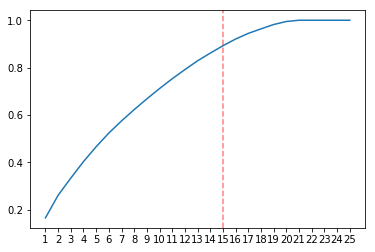

Cumulative explained variance at 15 components: 0.92067


In [17]:
from matplotlib import pyplot as plt
%matplotlib inline

x_axis = np.arange(X_train_imputed.shape[1]) + 1
plt.plot(x_axis, explained_var)

# At which point to cut off?
minexp = np.where(explained_var > 0.9)[0][0]
plt.axvline(x=minexp, linestyle='dashed', color='red', alpha=0.5)
plt.xticks(x_axis)
plt.show()

print("Cumulative explained variance at %i components: %.5f" % (minexp, explained_var[minexp]))

At 15 (of 25) features, we finally explain >90% cumulative variance in our components. This is not a significant enough feature reduction to warrant use of PCA, so we'll skip it.

# Setup our CV

In [18]:
from sklearn.model_selection import StratifiedKFold

# set up our CV
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

## Examine folds

In [19]:
folds = cv.split(X_train, y_train)
for i, fold in enumerate(folds):
    tr, te = fold
    print("Fold %i:" % i)
    print("Training sample indices:\n%r" % tr)
    print("Testing sample indices:\n%r" % te)
    print("\n")

Fold 0:
Training sample indices:
array([  1,   3,   4,   5,   6,   8,   9,  10,  12,  13,  15,  17,  18,
        21,  23,  24,  25,  26,  27,  28,  30,  31,  32,  34,  35,  36,
        37,  38,  39,  41,  42,  43,  44,  45,  47,  49,  51,  53,  54,
        55,  56,  58,  59,  62,  65,  66,  69,  70,  71,  73,  74,  75,
        79,  81,  82,  85,  87,  89,  90,  93,  94,  95,  96,  97,  99,
       100, 102, 103, 105, 106, 107, 108, 110, 111, 114, 115, 116, 117,
       118, 119, 121, 123, 125, 127, 129, 131, 132, 134, 135, 136, 139,
       140, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156,
       157, 158, 160, 162, 163, 166, 169, 170, 171, 172, 173, 174, 177,
       180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194,
       198, 199, 200, 201, 203, 204, 205, 207, 209, 210, 211, 213, 215,
       216, 218, 219, 220, 221, 224, 226])
Testing sample indices:
array([  0,   2,   7,  11,  14,  16,  19,  20,  22,  29,  33,  40,  46,
        48,  50,  52,  57,  60,  61,


# Baseline several models

We will build three models with default parameters and look at how the cross validation scores perform across folds, then we'll select the two better models to take into the model tuning stage.

__NOTE__ we could theoretically go straight to tuning all three models to select the best, but it is often times not feasible to run grid searches for every model you want to try.

In [20]:
from sklearn.pipeline import Pipeline
import numpy as np

# these are the pre-processing stages
stages = [
    ('dummy', packt_classes.DummyEncoder(columns=['sex', 'cp', 'restecg', 'slope', 'thal'])),
    ('impute', packt_classes.BaggedRegressorImputer(impute_cols=['cigperday', 'ca'], 
                                                    random_state=seed))
]

# we'll add a new estimator onto the end of the pre-processing stages
def build_pipeline(pipe_stages, estimator, est_name='clf'):
    # copy the stages
    pipe_stages = [stage for stage in pipe_stages]
    pipe_stages.append((est_name, estimator))
    
    # return the pipe
    return Pipeline(pipe_stages)

# report how the model did
def cv_report(cv_scores):
    mean = np.average(cv_scores)
    std = np.std(cv_scores)
    
    print("CV scores: %r" % cv_scores)
    print("Average CV score: %.4f" % mean)
    print("CV score standard deviation: %.4f" % std)

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# fit a Logistic regression
lgr_pipe = build_pipeline(stages, LogisticRegression(random_state=seed))
cv_report(cross_val_score(lgr_pipe, X=X_train, y=y_train, 
                          scoring='neg_log_loss', cv=cv))

CV scores: array([-1.25219065, -1.13973284, -1.06839339])
Average CV score: -1.1534
CV score standard deviation: 0.0757


In [22]:
from sklearn.ensemble import GradientBoostingClassifier

# fit a GBM
gbm_pipe = build_pipeline(stages, GradientBoostingClassifier(n_estimators=25, max_depth=3, random_state=seed))
cv_report(cross_val_score(gbm_pipe, X=X_train, y=y_train, 
                          scoring='neg_log_loss', cv=cv))

CV scores: array([-1.14662777, -1.19505187, -1.31838939])
Average CV score: -1.2200
CV score standard deviation: 0.0723


In [23]:
from sklearn.ensemble import RandomForestClassifier

# fit a RF
rf_pipe = build_pipeline(stages, RandomForestClassifier(n_estimators=25, random_state=seed))
cv_report(cross_val_score(rf_pipe, X=X_train, y=y_train, 
                          scoring='neg_log_loss', cv=cv))

CV scores: array([-1.09616462, -2.26438127, -1.94406386])
Average CV score: -1.7682
CV score standard deviation: 0.4929


## Initial thoughts

* Our GBM and logistic regression perform similarly
* Random forest did not perform very well and showed high variability across training folds
* Let's move forward with LR & GBM

# Tuning hyper-params

Now that we've baselined several models, let's choose a couple of the better-performing models to tune.

In [38]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

gbm_pipe = Pipeline([
    ('dummy', packt_classes.DummyEncoder(columns=['sex', 'cp', 'restecg', 'slope', 'thal'])),
    ('impute', packt_classes.BaggedRegressorImputer(impute_cols=['cigperday', 'ca'], 
                                                    random_state=seed)),
    ('clf', GradientBoostingClassifier(random_state=seed))
])

# define the hyper-params
hyper_params = {
    'impute__n_estimators': randint(10, 50),
    'impute__max_samples': uniform(0.75, 0.125),
    'impute__max_features': uniform(0.75, 0.125),
    'clf__n_estimators': randint(50, 400),
    'clf__max_depth': [1, 3, 4, 5, 7],
    'clf__learning_rate': uniform(0.05, 0.1),
    'clf__min_samples_split': [2, 4, 5, 10],
    'clf__min_samples_leaf': [1, 2, 5]
}

# define the search
gbm_search = RandomizedSearchCV(gbm_pipe, param_distributions=hyper_params,
                                random_state=seed, cv=cv, n_iter=100,
                                n_jobs=-1, verbose=1, scoring='neg_log_loss',
                                return_train_score=False)

gbm_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   55.2s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
          error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('dummy', DummyEncoder(columns=['sex', 'cp', 'restecg', 'slope', 'thal'],
       drop_one_level=True, sep='_', tmp_nan_rep='N/A')), ('impute', BaggedRegressorImputer(base_estimator=None, bootstrap=True,
            bootstrap_features=False, impute_cols=['cigperday', 'ca'],
            max_fea...        presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'clf__min_samples_split': [2, 4, 5, 10], 'clf__max_depth': [1, 3, 4, 5, 7], 'impute__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a147d2f28>, 'clf__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a147ff208>, 'clf__n_estimator...y.stats._distn_infrastructure.rv_frozen object at 0x1a147d2eb

In [39]:
lgr_pipe = Pipeline([
    ('dummy', packt_classes.DummyEncoder(columns=['sex', 'cp', 'restecg', 'slope', 'thal'])),
    ('impute', packt_classes.BaggedRegressorImputer(impute_cols=['cigperday', 'ca'], 
                                                    random_state=seed)),
    ('clf', LogisticRegression(random_state=seed))
])

# define the hyper-params
hyper_params = {
    'impute__n_estimators': randint(10, 50),
    'impute__max_samples': uniform(0.75, 0.125),
    'impute__max_features': uniform(0.75, 0.125),
    'clf__penalty': ['l1', 'l2'],
    'clf__C': uniform(0.5, 0.125),
    'clf__max_iter': randint(100, 500)
}

# define the search
lgr_search = RandomizedSearchCV(lgr_pipe, param_distributions=hyper_params,
                                random_state=seed, cv=cv, n_iter=100,
                                n_jobs=-1, verbose=1, scoring='neg_log_loss',
                                return_train_score=False)

lgr_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    9.9s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
          error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('dummy', DummyEncoder(columns=['sex', 'cp', 'restecg', 'slope', 'thal'],
       drop_one_level=True, sep='_', tmp_nan_rep='N/A')), ('impute', BaggedRegressorImputer(base_estimator=None, bootstrap=True,
            bootstrap_features=False, impute_cols=['cigperday', 'ca'],
            max_fea...alty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'impute__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a14705978>, 'clf__max_iter': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a14705ba8>, 'clf__penalty': ['l1', 'l2'], 'impute__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a14711b38>, 'clf__C': <scipy.stats._distn_infrastr

# Examine the results

Right away we can tell that the logistic regression model was *much* faster than the gradient boosting model. However, does the extra time spent fitting end up giving us a performance boost? Let's introduce our test set to the optimized models and select the one that performs better. We are using [__log loss__](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html) as a scoring metric.

See [this answer](https://stats.stackexchange.com/questions/208443/intuitive-explanation-of-logloss) for a full intuitive explanation of log loss, but note that lower (closer to zero) is better. There is no maximum to log loss, and typically, the more classes you have, the higher it will be.

### First the CV scores

In [40]:
from sklearn.utils import gen_batches

def grid_report(search, n_splits, key='mean_test_score'):
    res = search.cv_results_
    arr = res[key]
    slices = gen_batches(arr.shape[0], n_splits)
    
    return pd.Series({
            '%s_MEAN' % key: arr.mean(),
            '%s_STD' % key: arr.std(),
             
             # the std of fold scores for each set of hyper-params,
             # averaged over all sets of params
             '%s_STD_OVER_FOLDS' % key: np.asarray([
                    arr[slc].std()
                    for slc in slices
                ]).mean()})
    
pd.DataFrame.from_records([grid_report(gbm_search, cv.get_n_splits()), 
                           grid_report(lgr_search, cv.get_n_splits())],
                          index=["GBM", "Log. Reg"]).T

,GBM,Log. Reg
mean_test_score_MEAN,-2.073543,-1.125759
mean_test_score_STD,0.503357,0.002204
mean_test_score_STD_OVER_FOLDS,0.357103,0.001514


### If the CV scores meet business requirements, move on to model selection

In [41]:
from sklearn.metrics import log_loss

gbm_preds = gbm_search.predict_proba(X_test)
lgr_preds = lgr_search.predict_proba(X_test)

print("GBM test LOSS: %.5f" % log_loss(y_true=y_test, y_pred=gbm_preds))
print("Logistic regression test LOSS: %.5f" % log_loss(y_true=y_test, y_pred=lgr_preds))

GBM test LOSS: 0.96101
Logistic regression test LOSS: 0.97445


Note that in log loss, greater is WORSE. Therefore, the logistic regression was out-performed by the GBM. If the greater time to fit is not an issue for you, then this would be the better model to select. Likewise, you may favor model transparency over the extra few decimal points of accuracy, in which case the logistic regression might be favorable.

# Variable importance

Most times, it's not enough to build a good model. Most executives will want to know *why* something works. Moreover, in regulated industries like banking or insurance, knowing why a model is working is incredibly important for defending models to a regulatory board.

One of the methods commonly used for observing variable importance for non-linear methods (like our gradient boosting model) is to break the model into piecewise linear functions and measure how the model performs against each variable. This is called a "partial dependency plot."

### Raw feature importances

We can get the raw feature importances from the estimator itself, and match them up with the transformed column names:

In [42]:
# feed data through the pipe stages to get the transformed feature names
X_trans = X_train
for step in gbm_search.best_estimator_.steps[:-1]:
    X_trans = step[1].transform(X_trans)
    
transformed_feature_names = X_trans.columns
transformed_feature_names

Index(['age', 'trestbps', 'chol', 'cigperday', 'fbs', 'famhist', 'thalach',
       'exang', 'oldpeak', 'ca', 'sex_N/A', 'sex_female', 'cp_N/A',
       'cp_asymptomatic', 'cp_atypical anginal', 'cp_non-anginal',
       'restecg_N/A', 'restecg_normal', 'restecg_st-t', 'slope_N/A',
       'slope_downsloping', 'slope_flat', 'thal_N/A', 'thal_fixed',
       'thal_normal'],
      dtype='object')

In [43]:
best_gbm = gbm_search.best_estimator_.steps[-1][1]
importances = best_gbm.feature_importances_
importances

array([ 0.10196078,  0.08039216,  0.15490196,  0.02941176,  0.02352941,
        0.0254902 ,  0.09607843,  0.01960784,  0.14313725,  0.13137255,
        0.        ,  0.03921569,  0.        ,  0.04509804,  0.        ,
        0.        ,  0.        ,  0.02745098,  0.        ,  0.        ,
        0.        ,  0.0254902 ,  0.        ,  0.03137255,  0.0254902 ])

In [44]:
feature_importances = sorted(zip(np.arange(len(transformed_feature_names)), 
                                 transformed_feature_names, 
                                 importances), 
                             key=(lambda ici: ici[2]),
                             reverse=True)

feature_importances

[(2, 'chol', 0.15490196078431367),
 (8, 'oldpeak', 0.14313725490196069),
 (9, 'ca', 0.13137254901960776),
 (0, 'age', 0.10196078431372549),
 (6, 'thalach', 0.096078431372549039),
 (1, 'trestbps', 0.080392156862745132),
 (13, 'cp_asymptomatic', 0.045098039215686295),
 (11, 'sex_female', 0.03921568627450981),
 (23, 'thal_fixed', 0.03137254901960785),
 (3, 'cigperday', 0.029411764705882356),
 (17, 'restecg_normal', 0.027450980392156866),
 (5, 'famhist', 0.025490196078431372),
 (21, 'slope_flat', 0.025490196078431372),
 (24, 'thal_normal', 0.025490196078431372),
 (4, 'fbs', 0.023529411764705882),
 (7, 'exang', 0.019607843137254898),
 (10, 'sex_N/A', 0.0),
 (12, 'cp_N/A', 0.0),
 (14, 'cp_atypical anginal', 0.0),
 (15, 'cp_non-anginal', 0.0),
 (16, 'restecg_N/A', 0.0),
 (18, 'restecg_st-t', 0.0),
 (19, 'slope_N/A', 0.0),
 (20, 'slope_downsloping', 0.0),
 (22, 'thal_N/A', 0.0)]

### Partial dependency

In the following section, we'll break our GBM into a piecewise linear functions to gauge how different variables impact the target, and create [partial dependency plots](http://scikit-learn.org/stable/auto_examples/ensemble/plot_partial_dependence.html)

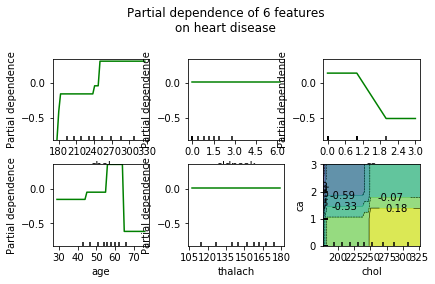

In [45]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence

def plot_partial(est, which_features, X, names, label):
    fig, axs = plot_partial_dependence(est, X, which_features,
                                       feature_names=names,
                                       n_jobs=3, grid_resolution=50,
                                       label=label)
    
    fig.suptitle('Partial dependence of %i features\n'
                 'on heart disease' % (len(which_features)))
    plt.subplots_adjust(top=0.8)  # tight_layout causes overlap with suptitle
        
plot_partial(est=best_gbm, X=X_trans,
             which_features=[2, 8, 9, 0, 6, (2, 9)],
             names=transformed_feature_names,
             label=1)

# Post-processing

Suppose our board of surgeons only cares if the prediction is class "3" with a probability of >=0.3. In this segment we'll write and test a piece of code that we'll use as post-processing in our Flask API.

In [46]:
def is_certain_class(predictions, cls=3, proba=0.3):
    # find the row arg maxes (ones that are predicted 'cls')
    argmaxes = predictions.argmax(axis=1)
    
    # get the probas for the cls of interest
    probas = predictions[:, cls]
    
    # boolean mask that becomes our prediction vector
    return ((argmaxes == cls) & (probas >= proba)).astype(int)

This means we'll need to use "`predict_proba`" rather than "`predict`":

In [47]:
P = lgr_search.predict_proba(X_test)
P[:5]

array([[ 0.06079324,  0.06840017,  0.41105351,  0.36934499,  0.09040809],
       [ 0.75965849,  0.17536797,  0.05236385,  0.01112373,  0.00148597],
       [ 0.54363485,  0.25425213,  0.15415816,  0.03354877,  0.01440608],
       [ 0.14354267,  0.17970444,  0.57161936,  0.07778423,  0.02734929],
       [ 0.91451301,  0.06250888,  0.00835557,  0.00902481,  0.00559774]])

In [48]:
is_certain_class(P)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0])

# Persist the model

Scikit-learn makes model persistence extraordinarily easily. Everything can be pickled via the "joblib" submodule. There are some exceptions:

1. Classes that contain unbound methods
2. Classes that contain instances of loggers
3. Others...

**In general, this is why we design our transformers to take string args as keys for callables rather than callables themselves!!!**

In [49]:
from sklearn.externals import joblib
import pickle
import os

model_location = "heart_disease_model.pkl"
with open(model_location, "wb") as mod:
    joblib.dump(lgr_search.best_estimator_, mod, protocol=pickle.HIGHEST_PROTOCOL)
    assert os.path.exists(model_location)
    
# demo how we can load and predict in one line!
is_certain_class(joblib.load(model_location).predict_proba(X_test))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0])

We can also use a Jupyter "magic function" to see that the pkl file exists in the file system:

In [36]:
!ls | grep "heart_disease_model"

heart_disease_model.pkl


## Accessing the REST API

Once the Flask app is live, we can test its `predict` endpoint:

In [81]:
import requests

# if you have a proxy...
os.environ['NO_PROXY'] = 'localhost'

# test if it's running
url = "http://localhost:5000/predict"

# print the GET result
response = requests.get(url)
print(response.json()['message'])

Send me a valid POST! I accept JSON data only:

	{data=[...]}


## Sending data:

Let's create a function that will accept a chunk of data, make it into a JSON and ship it to the REST API

In [92]:
import json

headers = {
    'Content-Type': 'application/json'
}

def get_predictions(data, url, headers):
    data = np.asarray(data)
    
    # if data is a vector and not a matrix, we need a vec...
    if len(data.shape) == 1:
        data = np.asarray([data.tolist()])
        
    # make a JSON out of it
    jdata = json.dumps({'data': data.tolist()})
    response = requests.post(url, data=jdata, headers=headers).json()
    print(response['message'])
    return response['predictions']

# ship last few for X_test
print(get_predictions(X_test[-10:], url, headers))

Valid POST (n_samples=10)
[1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
